In [1]:
import pandas as pd
import numpy as np
import gensim

In [72]:
#check how often words occur in the vocabulary of the model
#basepath  = "embedding_models/media-sexual-abuse/models/w2v_adtrouwtelnrcvk_2008_2013"
#model = gensim.models.Word2Vec.load(basepath)
#model.wv.vocab["eerwraak"].count

In [19]:
#model.most_similar(negative=['oudere'], positive=['jongere'])

In [ ]:
#model.most_similar(positive='verkrachtingen', topn=100)

In [2]:
PATH = 'output/'

In [4]:
dutch_neg = pd.read_csv(PATH + 'dutch_neg_gensimscores.csv')
dutch_neg.agg({'word2vec_score': np.mean})

word2vec_score   -0.050081
dtype: float64

In [7]:
ref_neg = pd.read_csv(PATH + 'ref_neg_gensimscores.csv')

def nationality(x):
    return x.split(',')[1][2:6]

ref_neg['target'] = ref_neg['pair'].map(nationality)
ref_neg['membership'] = "refugees"
ref_neg['types'] = "group"
ref_neg['id'] = "refugees"

In [8]:
arab_neg = pd.read_csv(PATH + 'arab_neg_gensimscores.csv')

def nationality_names(x):
    return x.split(',')[1][:-1].replace("'", "").strip().capitalize()

arab_neg['target'] = arab_neg['pair'].map(nationality_names)
arab_neg['membership'] = "refugees"
arab_neg['types'] = "names"
arab_neg['id'] = "arab names"


In [12]:
ingroup_neg = pd.read_csv(PATH + 'ingroup_neg_gensimscores.csv')

def nationality(x):
    return x.split(',')[1][2:5]

ingroup_neg['target'] = ingroup_neg['pair'].map(nationality)
ingroup_neg['membership'] = "ingroup"
ingroup_neg['types'] = "group"
ingroup_neg['id'] = "ingroup members"


In [13]:
dutch_neg = pd.read_csv(PATH + 'dutch_neg_gensimscores.csv')

dutch_neg['target'] = dutch_neg['pair'].map(nationality_names)
dutch_neg['membership'] = "ingroup"
dutch_neg['types'] = "names"
dutch_neg['id'] = "dutch names"



In [19]:
agg_df_neg = pd.concat([ingroup_neg, ref_neg, arab_neg, dutch_neg])
agg_df_neg['valence'] = 'neg'


In [18]:
result = pd.concat([ingroup_neg, ref_neg, arab_neg, dutch_neg])

In [20]:
from scipy.stats import ttest_ind

def get_ttest(result , cat):
    r1 = result[(result['todate'] == 2013 ) &  ( result['id'] == cat ) ]
    r2 = result[(result['todate'] == 2018 ) &  ( result['id'] == cat ) ]
    ref_results = ttest_ind(r1['word2vec_score'], r2['word2vec_score'])
    return print("for the group: {} t = {:.3f}, p = {:.3f}".format(cat.capitalize(), *ref_results))


In [21]:
recode = {"dui":"German",
"ned":"Dutch",
"bel":"Belgian",
"eur":"European",
"immi":"Immigrat",
"syri":"Syrian",
"migr":"Migrant",
"paki":"Pakistani",
"gamb":"Gambian",
"nige":"Nigerian",
"sene":"Senegalese",
"irak":"Iraqi",
"afgh":"Afghan",
"erit":"Eritrean",
"vluc":"Refugees",
"soma":"Somali",
"beng":"Bengali",
"bang":"Bengali",
"soed":"Sudanese",
"allo":"Foreigner", 
"fra": "France", 
"lux": "Luxembourg"}  
                                
result['target'] = result['target'].replace(recode)


In [22]:
result['Time Period'] = result['todate']
#recode_time = { 2018 : '2014 - 2018' , 2013 : '1991 - 2013'}
recode_time = { 2018 : '2014 - 2018' , 2013 : '2008 - 2013'}
result['Time Period'] = result['Time Period'].replace(recode_time)

In [23]:
result.groupby(['Time Period', 'id'])['word2vec_score'].mean()

Time Period  id             
2008 - 2013  arab names         0.144335
             dutch names       -0.039726
             ingroup members   -0.019548
             refugees           0.125601
2014 - 2018  arab names         0.172689
             dutch names       -0.060436
             ingroup members   -0.014741
             refugees           0.131137
Name: word2vec_score, dtype: float64

In [ ]:
#result

In [24]:
import seaborn as sns
#sns.catplot(data=result, x = 'word2vec_score', hue = 'membership')
sns.catplot(x="membership", y="word2vec_score",  hue='todate', data=result[result['types'] == 'names'], kind="bar",  color="b")

## t test between groups

In [25]:
get_ttest(result, 'arab names')
get_ttest(result, 'dutch names')
get_ttest(result, 'refugees')
get_ttest(result, 'ingroup members')

for the group: Arab names t = -4.083, p = 0.000
for the group: Dutch names t = 4.338, p = 0.000
for the group: Refugees t = -1.212, p = 0.226
for the group: Ingroup members t = -1.047, p = 0.295


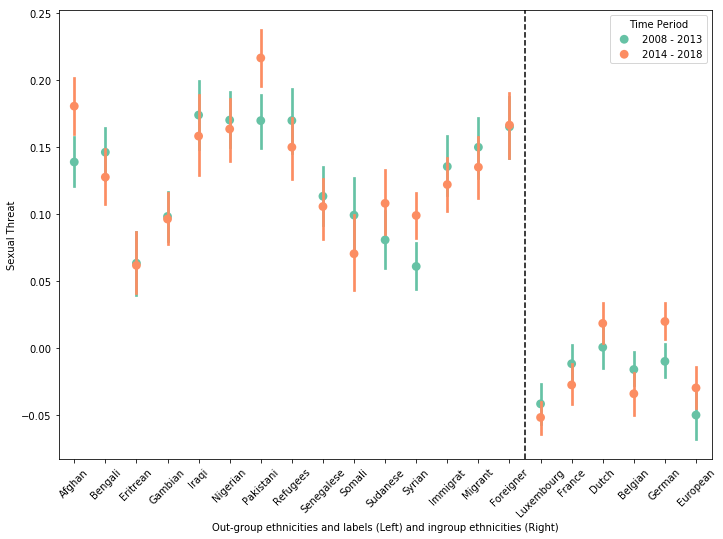

In [26]:
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import pyplot

a4_dims = (11.7, 8.27)
fig, ax = pyplot.subplots(figsize=a4_dims)

seq_col_brew = sns.color_palette("Greys_r", 2)
sns.set_palette(seq_col_brew)

# Just switch x and y
order_ =["Afghan",
"Bengali",
"Eritrean",
"Gambian",
"Iraqi",
"Nigerian",
"Pakistani",
"Refugees",
"Senegalese",
"Somali",
"Sudanese",
"Syrian",
"Immigrat",
"Migrant",
"Foreigner",
"Luxembourg" , 
"France",
"Dutch",
"Belgian",
"German",
"European" ]

#sns.boxplot(x="target", y="word2vec_score", data=ref_neg, palette="Set1")
a = sns.pointplot(x="target", y="word2vec_score", hue='Time Period', join=False, data=result[result['types'] == 'group'], order = order_ ,   palette="Set2", height=20)
a.set(xlabel='Out-group ethnicities and labels (Left) and ingroup ethnicities (Right)', ylabel='Sexual Threat')

plt.axvline(14.5, 0, 1.2, color='k', linestyle='--')

for item in a.get_xticklabels():
    item.set_rotation(45)

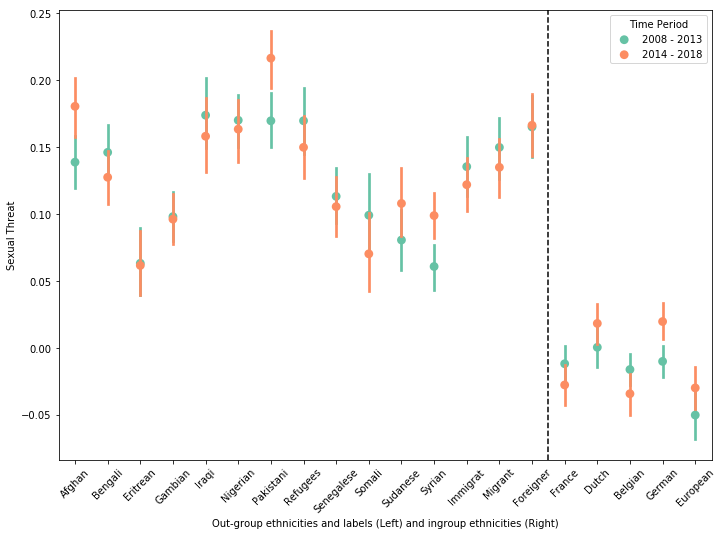

In [27]:
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import pyplot

a4_dims = (11.7, 8.27)
fig, ax = pyplot.subplots(figsize=a4_dims)

seq_col_brew = sns.color_palette("Greys_r", 2)
sns.set_palette(seq_col_brew)

# Just switch x and y
order_ =["Afghan",
"Bengali",
"Eritrean",
"Gambian",
"Iraqi",
"Nigerian",
"Pakistani",
"Refugees",
"Senegalese",
"Somali",
"Sudanese",
"Syrian",
"Immigrat",
"Migrant",
"Foreigner",
"France",
"Dutch",
"Belgian",
"German",
"European" ]

#sns.boxplot(x="target", y="word2vec_score", data=ref_neg, palette="Set1")
a = sns.pointplot(x="target", y="word2vec_score", hue='Time Period', join=False, data=result[result['types'] == 'group'], order = order_ ,   palette="Set2", height=20)
a.set(xlabel='Out-group ethnicities and labels (Left) and ingroup ethnicities (Right)', ylabel='Sexual Threat')

plt.axvline(14.5, 0, 1.2, color='k', linestyle='--')

for item in a.get_xticklabels():
    item.set_rotation(45)

In [64]:
#results.reset_index(inplace=True)
#agg_df_neg

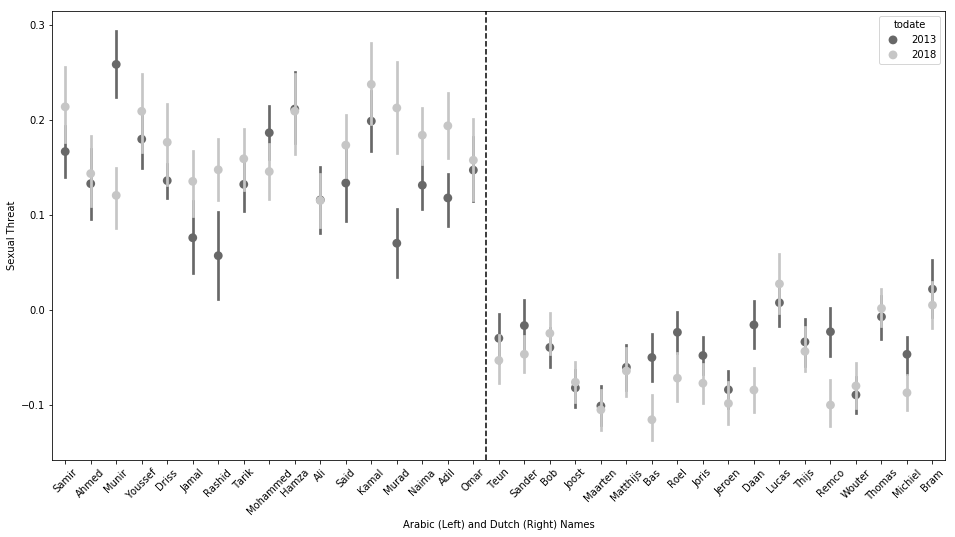

In [29]:
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import pyplot

a4_dims = (16, 8.27)
fig, ax = pyplot.subplots(figsize=a4_dims)

seq_col_brew = sns.color_palette("Greys_r", 2)
sns.set_palette(seq_col_brew)
# Just switch x and y

#sns.boxplot(x="target", y="word2vec_score", data=ref_neg, palette="Set1")
a = sns.pointplot(x="target", y="word2vec_score", 
                  hue='todate', join=False, 
                  data=agg_df_neg[agg_df_neg['types'] == 'names'], height=20)

a.set(xlabel='Arabic (Left) and Dutch (Right) Names', ylabel='Sexual Threat')

plt.axvline(16.5, 0, 1.2, color='k', linestyle='--')

for item in a.get_xticklabels():
    item.set_rotation(45)

In [30]:
len(result[result['types'] == "names"])

1470

In [31]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/compat/pandas.py:49: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


In [32]:
names = result[result['types'] == "names"]
len(names)

1470

In [33]:
group = result[result['types'] == "group"]

In [34]:
md = smf.mixedlm("word2vec_score ~ membership + todate ", names, groups=names["target"])
mdf_1 = md.fit(method="cg")

md = smf.mixedlm("word2vec_score ~ membership * todate ", names, groups=names["target"])
mdf_2 = md.fit(method="cg")

print(mdf_1.summary(), mdf_2.summary())

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/regression/mixed_linear_model.py:2045: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Library/Frameworks/Python.fr

              Mixed Linear Model Regression Results
Model:               MixedLM  Dependent Variable:  word2vec_score
No. Observations:    1470     Method:              REML          
No. Groups:          35       Scale:               0.0056        
Min. group size:     42       Likelihood:          1678.4083     
Max. group size:     42       Converged:           Yes           
Mean group size:     42.0                                        
-----------------------------------------------------------------
                       Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-----------------------------------------------------------------
Intercept              -1.308    1.570 -0.834 0.405 -4.385  1.768
membership[T.refugees]  0.209    0.012 18.113 0.000  0.186  0.231
todate                  0.001    0.001  0.802 0.423 -0.001  0.002
Group Var               0.001    0.004                           
                    Mixed Linear Model Regression Results
Model:                 MixedLM  

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/regression/mixed_linear_model.py:2026: ConvergenceWarning: Gradient optimization failed.
  warnings.warn(msg, ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/regression/mixed_linear_model.py:2045: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


In [35]:
import statsmodels.api as sm  

model = sm.MixedLM.from_formula("word2vec_score ~ membership * todate", groups=names["target"], data=names)                                                                
result = model.fit(method="cg") 

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Library/Frameworks/Python.frame

In [ ]:
group

In [71]:
md = smf.mixedlm("word2vec_score ~ membership + todate ", group, groups=group["target"])
mdf_1 = md.fit(method="cg")

md = smf.mixedlm("word2vec_score ~ membership * todate ", group, groups=group["target"])
mdf_2 = md.fit(method="cg")

print(mdf_1.summary(), mdf_2.summary())

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/regression/mixed_linear_model.py:2045: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


              Mixed Linear Model Regression Results
Model:               MixedLM  Dependent Variable:  word2vec_score
No. Observations:    2772     Method:              REML          
No. Groups:          21       Scale:               0.0070        
Min. group size:     84       Likelihood:          2892.5859     
Max. group size:     168      Converged:           Yes           
Mean group size:     132.0                                       
-----------------------------------------------------------------
                       Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-----------------------------------------------------------------
Intercept              -2.157    1.284 -1.680 0.093 -4.674  0.359
membership[T.refugees]  0.149    0.017  8.607 0.000  0.115  0.183
todate                  0.001    0.001  1.665 0.096 -0.000  0.002
Group Var               0.001    0.005                           
                  Mixed Linear Model Regression Results
Model:                MixedLM     

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/regression/mixed_linear_model.py:2045: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


In [ ]:
md = smf.mixedlm("word2vec_score ~ membership + todate ", names, groups=names["target"])
mdf_1 = md.fit(method="cg")

md = smf.mixedlm("word2vec_score ~ membership * todate ", names, groups=names["target"])
mdf_2 = md.fit(method="cg")

print(mdf_1.summary(), mdf_2.summary())

In [ ]:
md = smf.mixedlm("word2vec_score", group, groups=group["target"])
mdf_1 = md.fit(method="cg")

In [ ]:
md = smf.mixedlm("word2vec_score ~ membership + todate", group, groups=group["target"])
mdf = md.fit(method="lbfgs")

In [ ]:
md = smf.mixedlm("word2vec_score ~ membership * todate", group, groups=group["target"])
mdf = md.fit()

In [ ]:
print(mdf.summary())

In [ ]:
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import pyplot

a4_dims = (11.7, 8.27)
fig, ax = pyplot.subplots(figsize=a4_dims)


# Just switch x and y
order_ =['Dutch', 'German', 'Belgian', 'European', 'Nigerian', 
       'Malian', 'Somali', 'Eritrean',  'Senegalees',
       'Syrian', 'Afghan', 'Foreigner', 'Refugee', 'Immigrant', 'Migrant']

#sns.boxplot(x="target", y="word2vec_score", data=ref_neg, palette="Set1")
a = sns.pointplot(x="target", y="word2vec_score", 
                  hue='todate', join=False, data=result, col = 'types', palette="Set1", height=20)
for item in a.get_xticklabels():
    item.set_rotation(45)


In [ ]:
result['target'].unique()

In [ ]:
result

In [ ]:
# Select which box you want to change    
plt.figure(figsize=(15,8))

sns.set(style="ticks", font='Roboto Condensed')
#sns.set_palette("cubehelix", 4)

seq_col_brew = sns.color_palette("Greys_r", 2)
sns.set_palette(seq_col_brew)

sns.set_context("paper", font_scale=1.1, rc={"lines.linewidth": 1.1})
g=sns.catplot(x="target", y="word2vec_score", hue="todate", 
                 data = result, kind="bar")
sns.despine(trim=True)

g.savefig('test6.png', format='png', dpi=600)

In [ ]:
# Select which box you want to change    
sns.set(style="ticks", font='Roboto Condensed')
#sns.set_palette("cubehelix", 4)

seq_col_brew = sns.color_palette("Greys_r", 2)
sns.set_palette(seq_col_brew)

sns.set_context("paper", font_scale=1.1, rc={"lines.linewidth": 1.1})
g=sns.catplot(x="membership", y="word2vec_score", hue="todate", col = 'types', 
                 data = result, kind="bar", height=14, 
                 width=0.5,fliersize=2.5,linewidth=1.1, notch=False)
sns.despine(trim=True)

plt.axvline(3.5, 0, 1.2, color='k', linestyle='--')
g.savefig('test6.png', format='png', dpi=600)

In [ ]:
# Select which box you want to change    
sns.set(style="ticks", font='Roboto Condensed')
#sns.set_palette("cubehelix", 4)

seq_col_brew = sns.color_palette("Greys_r", 2)
sns.set_palette(seq_col_brew)

sns.set_context("paper", font_scale=1.1, rc={"lines.linewidth": 1.1})
g=sns.factorplot(x="target", y="word2vec_score", hue="todate",
                 data = result, kind="box", height=14, 
                 width=0.5,fliersize=2.5,linewidth=1.1, notch=False)
sns.despine(trim=True)

plt.axvline(3.5, 0, 0.6, color='k', linestyle='--')
g.savefig('test6.png', format='png', dpi=600)


In [ ]:
# Select which box you want to change    
sns.set(style="ticks", palette='Set2', font='Roboto Condensed')
sns.set_context("paper", font_scale=1.1, rc={"lines.linewidth": 1.1})
g=sns.factorplot(x="target", y="word2vec_score", hue="todate",
                 data = result, kind="box", height=14, 
                 width=0.5,fliersize=2.5,linewidth=1.1, notch=False)
sns.despine(trim=True)
g.savefig('test6.png', format='png', dpi=600)


In [ ]:
ingroup_neg['target']

In [ ]:
plt.figure(figsize=(20,10))
plt.bar(agg_df_pos['target'], agg_df_pos['mean'], color="b", yerr=agg_df_pos['std'] )

In [ ]:
agg_df_pos.rename(columns={"mean": "mean_pos", "std": "std_pos"}, inplace = True)
agg_df_neg.rename(columns={"mean": "mean_neg", "std": "std_neg"}, inplace = True)

together = pd.merge(agg_df_pos, agg_df_neg, on='target')

together = pd.merge(agg_df_pos, agg_df_neg, on='target')

together['IAT'] = together['mean_neg'] - together['mean_pos']
together

In [ ]:
together = pd.merge(agg_df_pos, agg_df_neg, on='target')

together['IAT'] = together['mean_neg'] - together['mean_pos']
together

plt.figure(figsize=(20,10))
plt.bar(together['target'], together['IAT'], color="b" )

In [ ]:
pos = nat_pos.groupby('target').agg({'word2vec_score': np.mean}).plot(kind="bar", figsize=(20,10))

In [ ]:
arab_pos = pd.read_csv(PATH + 'dutch_pos_gensimscores.csv')
arab_pos.agg({'word2vec_score': np.mean})


In [ ]:
fiets = '/Users/anne/repos/embedding_models/bigrams/w2v_adtrouw_2014_2018'
kaas = '/Users/anne/repos/embedding_models/bigrams/w2v_adtrouw_1991_2013'


In [ ]:
model = gensim.models.Word2Vec.load(fiets)


In [ ]:
model2 = gensim.models.Word2Vec.load(kaas)


In [ ]:
sentence_obama = 'Premier Mark Rutte vindt dat hij niets fout heeft gedaan toen hij het onafhankelijke Planbureau voor de Leefomgeving vroeg om de eerste doorrekening van het klimaatakkoord over Prinsjesdag heen te tillen. De minister-president zei woensdag in een Kamerdebat dat hij "niets vreemds" heeft gedaan.'
sentence_president = 'verkracht aangerand vermoord'
sentence_obama = sentence_obama.lower().split()
sentence_president = sentence_president.lower().split()

In [ ]:
model.init_sims(replace=True) 


In [ ]:
distance = model.wv.wmdistance(sentence_obama, sentence_president)
print(distance)

In [ ]:
#model.most_similar('vrouw', topn = 100)
model.similarity('verkrachter', 'fiets')

In [ ]:
import nltk
import csv
import string
from gensim.models import Phrases
from gensim.models import Word2Vec
from nltk.corpus import stopwords
import re

FILENAME = 'short_test.txt'
stopWords = stopwords.words('dutch')
print(stopwords)

sentences = [line.strip() for line in open(FILENAME).readlines() if len(line)>1 and len(line) < 500]
for line in sentences:
    if (len(line)) > 130:
        print(line)
#sentences = re.sub(r'[^A-Za-z0-9\s.]',r'',str(sentences).lower())
#sentences = re.sub(r'\n',r' ',sentences)


#sentences = " ".join([word for word in sentence.split() for sentence in sentences if word not in stopWords])
sentences = [" ".join([w for w in sentence.split() if w not in stopWords]) for sentence in sentences]

#tokenized_text = [nltk.word_tokenize(sentence) for sentence in sentences]
#rint(tokenized_text)

In [ ]:
bigram_model = Word2Vec(bigram[sentences], size=100)

In [ ]:
model.most_similar("senegalees")

In [ ]:
#len(bigram_model.wv.vocab)
model2.wv.vocab['david'].count



In [ ]:
model.wv.vocab['david'].count



In [ ]:
import collections

bigram_counter = collections.Counter()
for key in bigram.vocab.keys():
    if key not in stopwords.words("dutch"):
        print(key)
        if len(int(key.split("_"))) > 1:
            bigram_counter[key] += bigram.vocab[key]

for key, counts in bigram_counter.most_common(20):
    print ('{0: <20} {1}'.format(key.encode("utf-8"), counts))


In [ ]:
list(bigram[sentences])[:2]